# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

!pip install citipy

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city_weather = []

for city in cities:
    try:
        query_url = base_url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        response = requests.get(query_url).json()
        lat = response["coord"]["lat"]
        temp_f = response["main"]["temp"]
        country_name = response["sys"]["country"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        windspeed = response["wind"]["speed"]
        weather = {"latitude":lat, "temperature":temp_f, "country name":country_name,"city":city, "humidity":humidity, "cloudiness":cloudiness,
               "windspeed":windspeed}
    
        city_weather.append(weather)
    
    except:
        pass




### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv("city_weather.csv")

In [5]:
city_weather_df.head()

,city,cloudiness,country name,humidity,latitude,temperature,windspeed
0,bluff,1,NZ,58,-46.60,69.01,1.99
1,lorengau,99,PG,82,-2.02,81.54,9.82
2,beidao,59,CN,26,34.57,60.69,1.12
3,touros,75,BR,94,-5.20,77.00,4.70
4,buin,52,CL,43,-33.73,69.80,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

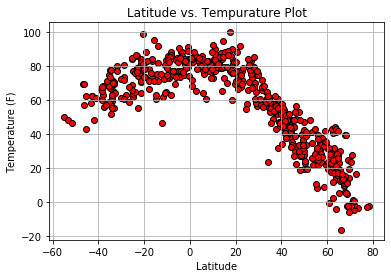

In [6]:
plt.scatter(city_weather_df["latitude"],city_weather_df["temperature"],marker="o",facecolors="r", edgecolors="black")
plt.title("Latitude vs. Tempurature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid("both")

#### Latitude vs. Humidity Plot

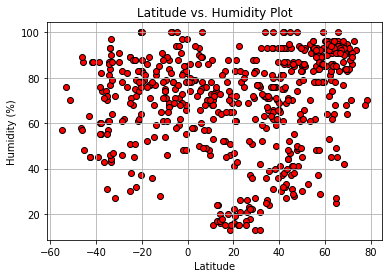

In [7]:
plt.scatter(city_weather_df["latitude"],city_weather_df["humidity"],marker="o",facecolors="r", edgecolors="black")
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid("both")

#### Latitude vs. Cloudiness Plot

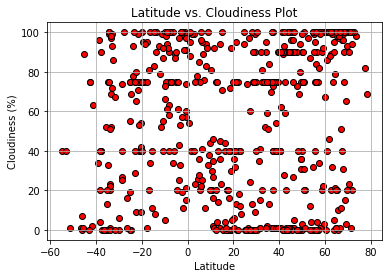

In [8]:
plt.scatter(city_weather_df["latitude"],city_weather_df["cloudiness"],marker="o",facecolors="r", edgecolors="black")
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid("both")

#### Latitude vs. Wind Speed Plot

(-1.9696766004415012, 60)

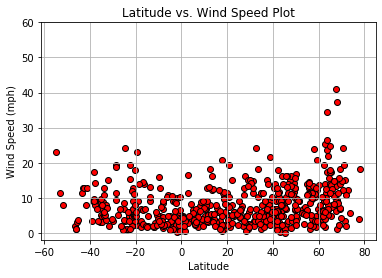

In [9]:
plt.scatter(city_weather_df["latitude"],city_weather_df["windspeed"],marker="o",facecolors="r", edgecolors="black")
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid("both")
plt.ylim(top=60)

In [ ]:
# Three observable trends:
# 1. Most countries fall between 0-20 mph for windspeed, when latitude increases or decreases, there tends to be a
# little more deviation and some countries with more extreme wind conditions
# 2. There is no observable trend for cloudiness vs latitude, as the scatter plot is completely random
# 3. Temperature tends to be be hottest between 0 and -10 degrees Latitude. Countries are observably colder in the 
# North with a progressive linear decrease in temperature to about -20 F. Countries in the South are hotter and tend
# to only decrease to about 40 F 